# Titanic data analysis and ML

## Dataset
1. PassengerId: ID of the passenger.
2. Pclass: Ticket Class.
3. Name: Name of the passenger.
4. Sex: gender orientation.
5. Age: passenger's age.
6. SibSp: siblings / spouses aboard the Titanic.
7. Parch: parents on the train.
8. Ticket: ticket number.
9. Fare: cost of the ticket.
10. Cabin: cabin number 
11. Embarked: Port of Embarkation.
12. Survived: survived or not(1,0)

In [1]:
# importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
plt.rcParams['figure.figsize'] = (9.0,9.0)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


### Reading the dataset

In [2]:
train_dataset = pd.read_csv('/kaggle/input/titanic/train.csv')
test_dataset =  pd.read_csv('/kaggle/input/titanic/test.csv')

In [3]:
# Shape of the datasets
print(train_dataset.shape, test_dataset.shape)

(891, 12) (418, 11)


In [4]:
test_dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Missing Value Imputation

In [6]:
train_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

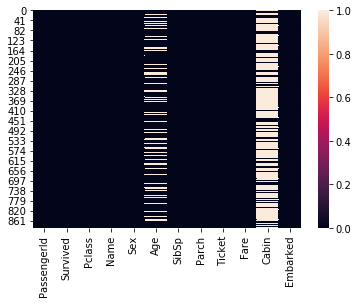

In [8]:
sb.heatmap(train_dataset.isnull())

In [9]:
# writing a function for imputing the data
def imput(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [10]:
train_dataset['Age'] = train_dataset[['Age','Pclass']].apply(imput, axis=1)

In [11]:
# a function for missing value imputation
def impu(Embarked):
    if pd.isnull(Embarked):
        return 'S'
    else:
        return Embarked

In [12]:
train_dataset['Embarked'] = train_dataset['Embarked'].apply(impu)

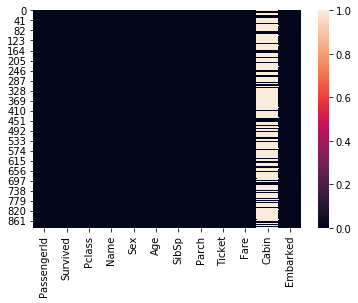

In [13]:
sb.heatmap(train_dataset.isnull())

In [14]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
test_dataset.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [16]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [17]:
test_dataset['Age'] = test_dataset[['Age','Pclass']].apply(imput, axis=1)

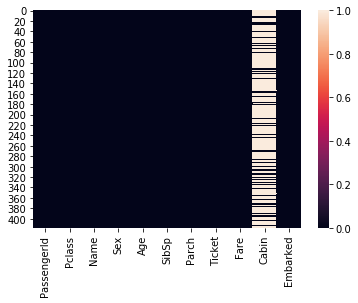

In [18]:
sb.heatmap(test_dataset.isnull())

## Data Visualization

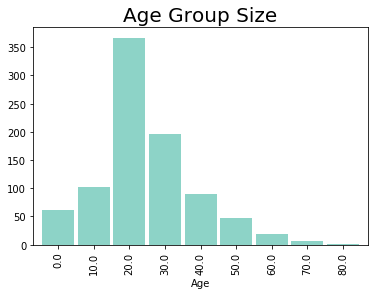

In [19]:
train_dataset.groupby(train_dataset.Age//10*10).size().plot.bar(cmap='Set3', width=0.9)
plt.title('Age Group Size', fontsize = 20)
plt.show()

Plot of sizes of differnt age groups.

insights from graph:
* Number of passengers of age 20 years were 350+.this is highest compared to others.
* least number of passengers were of age 60 and above.

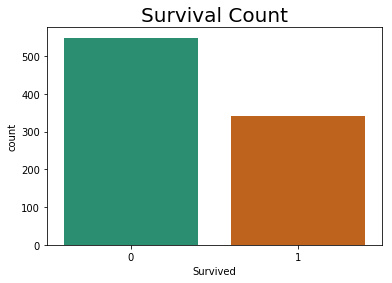

In [20]:
sb.countplot(x='Survived',data = train_dataset, palette = 'Dark2')
plt.title('Survival Count', fontsize = 20)
plt.show()

Around 300 passengers survived and more than 500 died.

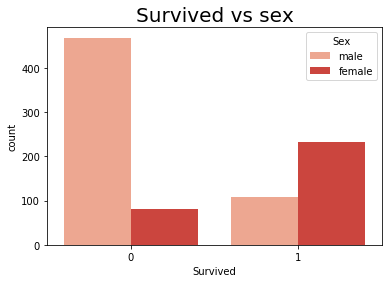

In [21]:
sb.countplot(x='Survived',hue = train_dataset['Sex'], data = train_dataset, palette = 'Reds')
plt.title('Survived vs sex', fontsize = 20)
plt.show()

Insights from graph:
1. males survived: 100
   males died: 400+

2. females survived: 200+
   females died: 100 

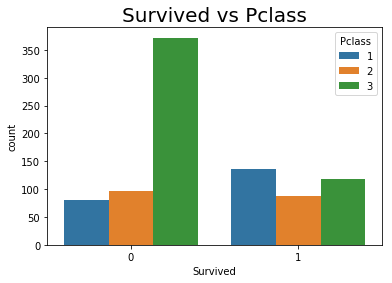

In [22]:
sb.countplot(x='Survived', hue='Pclass',data=train_dataset)
plt.title('Survived vs Pclass', fontsize = 20)
plt.show()

Graph on passenger survival Pclass wise.

Insights from graph:
1. Number of passengers survived of every class is almost same.
2. highest number of passengers died were of Class 3

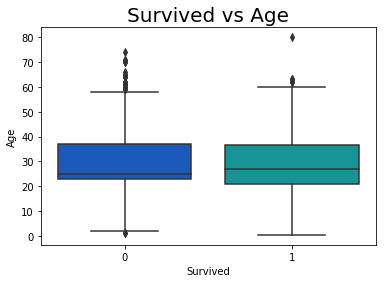

In [23]:
sb.boxplot(x='Survived', y='Age',data=train_dataset, palette = 'winter')
plt.title('Survived vs Age', fontsize = 20)
plt.show()


A boxplot representing survival age wise.

## Data Encoding

In [24]:
train_dataset = train_dataset.set_index('PassengerId')
train_dataset = train_dataset.drop(columns=['Name', 'Ticket', 'Fare', 'Cabin'])
train_dataset = pd.get_dummies(train_dataset, columns=['Pclass', 'Sex', 'Embarked'])

In [25]:
train_dataset.head()

,Survived,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,
1,0,22.0,1,0,0,0,1,0,1,0,0,1
2,1,38.0,1,0,1,0,0,1,0,1,0,0
3,1,26.0,0,0,0,0,1,1,0,0,0,1
4,1,35.0,1,0,1,0,0,1,0,0,0,1
5,0,35.0,0,0,0,0,1,0,1,0,0,1


In [26]:
test_dataset = test_dataset.set_index('PassengerId')
test_dataset = test_dataset.drop(columns=['Name', 'Ticket', 'Fare', 'Cabin'])
test_dataset = pd.get_dummies(test_dataset, columns=['Pclass', 'Sex', 'Embarked'])


In [27]:
test_dataset.head()

,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
892,34.5,0,0,0,0,1,0,1,0,1,0
893,47.0,1,0,0,0,1,1,0,0,0,1
894,62.0,0,0,0,1,0,0,1,0,1,0
895,27.0,0,0,0,0,1,0,1,0,0,1
896,22.0,1,1,0,0,1,1,0,0,0,1


## Train Test data Split

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_dataset.drop(['Survived'],axis=1),
                                                    train_dataset['Survived'], test_size=0.2, random_state=101)


In [29]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)
predictions = logmodel.predict(x_test)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### R2

In [30]:
print('Score:', logmodel.score(x_test,y_test))

Score: 0.8212290502793296


### Classification report

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85        99
           1       0.85      0.72      0.78        80

    accuracy                           0.82       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.82      0.82      0.82       179



In [32]:
predictions


array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0])

In [33]:
logmodel.predict(test_dataset)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [34]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

## Roc Curve

In [35]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr, tpr, color = 'lime', label = 'ROC')
    plt.plot([0,1], [0, 1], color = 'darkblue', linestyle='--')
    plt.xlabel('False positive rate')
    plt.ylabel('true positive rate')
    plt.title('receiver operating charcteristic (ROC Curve')
    plt.legend()
    plt.show()

In [36]:
probs = logmodel.predict_proba(x_test)

In [37]:
probs = probs[:,1]
probs

array([0.31953324, 0.95270383, 0.48383204, 0.17041135, 0.26204633,
       0.0542924 , 0.39088732, 0.10691513, 0.86294773, 0.56599509,
       0.26204633, 0.07655529, 0.71500304, 0.10009797, 0.11674465,
       0.07297181, 0.60475988, 0.1257665 , 0.15040716, 0.81114099,
       0.06911698, 0.0536042 , 0.63368367, 0.56599509, 0.04559566,
       0.21606915, 0.12986247, 0.29877092, 0.09251523, 0.05430228,
       0.83260867, 0.50247389, 0.63368367, 0.07655529, 0.07862145,
       0.93846797, 0.08191503, 0.05064033, 0.08411267, 0.41128506,
       0.65927444, 0.56599509, 0.90082324, 0.41334277, 0.1973704 ,
       0.39088732, 0.05175149, 0.32354119, 0.06678991, 0.26204633,
       0.83458581, 0.28122021, 0.78567042, 0.71966827, 0.63368367,
       0.10009797, 0.16004129, 0.1257665 , 0.33692754, 0.90926695,
       0.91615141, 0.15488728, 0.03961009, 0.58254194, 0.05621027,
       0.2990902 , 0.84185352, 0.39088732, 0.62343964, 0.39088732,
       0.5646637 , 0.15040716, 0.14577176, 0.11790601, 0.53730

In [38]:
auc = roc_auc_score(y_test, probs)
print("auc:%.2f" %auc)

auc:0.88


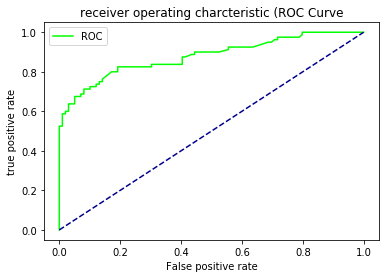

In [39]:
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr,tpr)